<a href="https://colab.research.google.com/github/fstoco/machine-learning/blob/main/Ensemble_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [ ]:
from pandas import read_csv
data= read_csv('Iris.csv')
X= data.drop(['Id','Species'], axis=1)
y=data['Species']
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
X.head(2)    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = LogisticRegression( )    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

label = ['Decision Tree', 'LR', 'Bagging Tree', 'Bagging LR']
clf_list = [clf1, clf2, bagging1, bagging2]
 

for clf, label  in zip(clf_list, label ):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(scores.mean(), scores.std(), label))

Accuracy:   (0.66, 0.0, 'Decision Tree')
Accuracy:   (0.9733333333333333, 0.009428090415820642, 'LR')
Accuracy:   (0.9533333333333333, 0.024944382578492918, 'Bagging Tree')
Accuracy:   (0.9666666666666667, 0.018856180831641284, 'Bagging LR')


In [ ]:
num_est = np.arange(10,100,10)
num_est

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:

#Ensemble Size
 
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for i in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=i, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
bg_clf_cv_mean

[0.8466666666666667,
 0.94,
 0.9533333333333333,
 0.9466666666666667,
 0.9466666666666667,
 0.94,
 0.96,
 0.96,
 0.86]

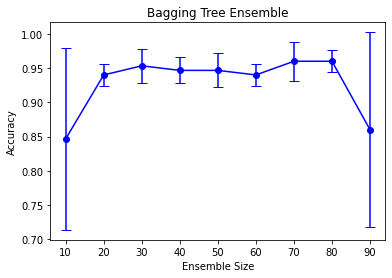

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

# use svc and Naive Bayes classifiers as the base model, apply bagging approach for both base classifer, specify the best bagging approach via evaluating accuracy in 100 mc runs. 


# step 1---function: create the models
#step 2---function : evaluate the models in 100 mc runs
#step 3: use functions 1 and 2 on the dataset

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier



In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict() 
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['bagg_svc'] = BaggingClassifier(base_estimator=SVC(), n_estimators=10) # 10 bags
  models['bagg_nb'] = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=10) # 10 bags
  return models

In [ ]:
models=get_models()
models.items()

In [ ]:
# create the function to evaluate the models
import numpy as np
from sklearn.metrics import accuracy_score
def evaluate_model(model, X, y):
  acc = []
  for j in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = j)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    acc.append(accuracy)
    scores=np.mean(acc) 
    return scores

In [ ]:
# specify the input and output variables

from pandas import read_csv
data= read_csv('Iris.csv')

X= data.drop(['Id','Species'], axis=1)
y=data['Species']

In [ ]:
#run the models on the dataset
from sklearn.model_selection import train_test_split
 
from numpy import mean, std
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 


>svm 0.978 (0.000)
>bayes 1.000 (0.000)
>bagg_svc 0.978 (0.000)
>bagg_nb 0.978 (0.000)


# Example: use mtcars dataset, consider cyl as the output variable and the remaining features are input variables. Train 4 bagging classifiers using this dataset in 100 mc runs and print out the mean and standard deviation of accuracy.


Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

In [ ]:
#Ensemble Size
num_est = np.arange(10,100,10)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

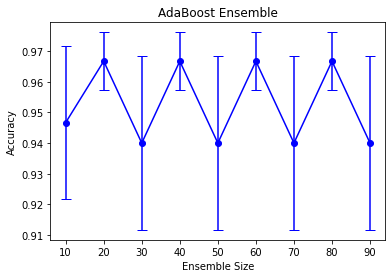

In [ ]:
plt.figure()
plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std,c='blue', fmt='-o', capsize=5)
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

#Use mtcars dataset, consider cyl as the output varible. Apply decision tree classifier to model 70% of the dataset and evaluate its accuracy. 
#run the model based on Adaboost and print out accuracy, which model has the higher accuracy?

In [ ]:
from pandas import read_csv
data= read_csv('mtcars.csv')
X= data.drop(['cyl'], axis=1)
y=data['cyl']
X.head(2)


,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,160.0,110,3.9,2.620,16.46,0,1,4,4
1,21.0,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
from sklearn.tree import DecisionTreeClassifier
base=DecisionTreeClassifier()

In [ ]:
#Ensemble Size
num_est = 50 # number of subset
 
score_dt = cross_val_score(base, X, y, cv=3, scoring='accuracy')
ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=n_est)
score_ada = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
print('accuracy of dt classifer:',np.mean(score_dt) )  
print('accuracy of adaBoost classifer:',np.mean(score_ada) ) 

accuracy of dt classifer: 0.8757575757575758
accuracy of adaBoost classifer: 0.8424242424242424
